# Assignment

## Exploratory Data Analysis (EDA)
1. Import necessary libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

2. Load relevant **Dataset** for analysis

In [17]:
data = pd.read_csv("aps_failure_set.csv")
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


3. Displaying first 5 instances of dataset

In [18]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


4. Extracting the size/shape of dataset.

In [19]:
rows, columns = data.shape
print(f"Number of Instances: {rows}")
print(f"Number of Features: {columns}")

Number of Instances: 60000
Number of Features: 171


5. Getting the summary of the dataset information.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [21]:
data['aa_000'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 60000 entries, 0 to 59999
Series name: aa_000
Non-Null Count  Dtype
--------------  -----
60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


#### It shows out of 171 columns, only one (aa_000) of them is of numerical type (int) and rest of them are categorical (string). Also there are no NUll (missing) values in any column.

6. Utilizing Label Encoding from *sklearn* to transform string data into integers.

This conversion is performed to facilitate its utilization in subsequent analyses and interpolations.

In [22]:
let = LabelEncoder()

for i in data.columns:
    data[i] = let.fit_transform(data[i])

7. Visualization (Pie Plot) using *matplotlib* and *seaborn* 

Visualization of Dataset to get a better insight of the data

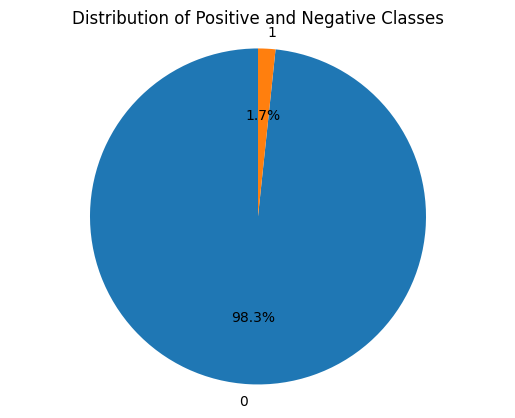

In [30]:
class_counts = data['class'].value_counts()

# Plot a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 

plt.title('Distribution of Positive and Negative Classes')
plt.show()

#### It can be inferred from the pie chart that the dataset primarily consists of instances where trucks experience failures in components that are not associated with the APS system, accounting for approximately *98.3%* of the total data. Conversely, component failures directly related to the APS system constitute a mere *1.7%* of the dataset.

## Dimensionality Reduction Using Principal Component Analysis (PCA)

## The Curse of Dimensionality

The Challenge of High-Dimensional Data, often referred to as the "Curse of Dimensionality," introduces several complexities and obstacles when dealing with datasets containing a large number of attributes. Its impacts on data analysis are as follows:
 - Increasing dimensions lead to a surge in computational demands for algorithms.
 - High-dimensional data can significantly heighten the risk of overfitting in machine learning models.
 - With a plethora of dimensions, it becomes increasingly challenging to extract meaningful patterns or insights.
 - Data points are scattered more widely in high-dimensional space, complicating tasks such as finding nearest neighbors or assessing similarities.

One effective approach to combat this challenge is dimensionality reduction, and one of the techniques used for this purpose is Principal Component Analysis (PCA).

1. Leveraging the PCA Module within scikit-learn for Dimensionality Reduction

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

2. Data Standardization by *sklearn.preprocessing*

In [24]:
scaler = StandardScaler()
Standardized_data = scaler.fit_transform(data)
Standardized_data

array([[-0.13018891,  1.19159108,  0.53075991, ..., -0.73351866,
        -0.22474038, -0.23069838],
       [-0.13018891, -0.00875114,  0.53075991, ..., -0.18281782,
        -0.22474038, -0.23069838],
       [-0.13018891,  0.36900137,  0.53075991, ...,  1.47847888,
        -0.22474038, -0.23069838],
       ...,
       [-0.13018891, -1.03091398, -1.98735109, ..., -0.73351866,
        -0.22474038, -0.23069838],
       [-0.13018891,  1.26738608,  0.53075991, ...,  1.12466072,
        -0.22474038, -0.23069838],
       [-0.13018891,  0.30802918,  0.53075991, ..., -0.11116648,
        -0.22474038, -0.23069838]])

####   The process of standardization, which involves mean centering and scaling to unit variance, plays a vital role in PCA analysis. Standardization guarantees that each feature contributes equally to the PCA analysis and aids in accurately capturing the inherent variance of each individual feature.

3. Employing PCA for the Conversion of Original Data

In [25]:
pca = PCA()
pca.fit(Standardized_data)

PCA()

#### PCA (Principal Component Analysis) is utilized to restructure the original data into a new collection of orthogonal attributes known as principal components. These components are designed to elucidate the highest proportion of variance present within the dataset.

4. Computing Explained Variance Ratio

In [26]:
expl_var_ratio = pca.explained_variance_ratio_
print(expl_var_ratio)

[1.33244725e-01 6.79023540e-02 5.93759898e-02 4.96641181e-02
 4.37523483e-02 2.80370345e-02 2.39090446e-02 1.93514205e-02
 1.69558886e-02 1.42395333e-02 1.37942134e-02 1.22897537e-02
 1.05263495e-02 9.80522173e-03 9.20516074e-03 8.75267476e-03
 8.37485445e-03 8.27254678e-03 7.76212003e-03 7.57683685e-03
 7.36066150e-03 7.00418788e-03 6.89101202e-03 6.72106157e-03
 6.38597174e-03 6.29711295e-03 6.13235750e-03 6.06363742e-03
 5.92637585e-03 5.86462146e-03 5.78668830e-03 5.68400381e-03
 5.58745557e-03 5.55749602e-03 5.49435565e-03 5.39396148e-03
 5.36021889e-03 5.30258710e-03 5.27876865e-03 5.23287794e-03
 5.16048310e-03 5.11422473e-03 5.05415365e-03 5.00953699e-03
 4.92879615e-03 4.88535759e-03 4.87263221e-03 4.81969957e-03
 4.80955745e-03 4.69762761e-03 4.65652734e-03 4.60889029e-03
 4.55634816e-03 4.51717147e-03 4.49225120e-03 4.48047143e-03
 4.41373854e-03 4.38127991e-03 4.32542962e-03 4.29044471e-03
 4.25537226e-03 4.22220720e-03 4.16593664e-03 4.10374458e-03
 4.08123439e-03 4.038734

#### Calculating the explained variance ratio (expl_var_ratio) allows us to assess how much each principal component contributes to the total variance in the data, helping us understand the importance of each component.

5. Cumulative Explained Variance with the help of *Numpy*

In [31]:
cumul_expl_var = np.cumsum(expl_var_ratio)
components_no = np.argmax(cumul_expl_var >= 0.995) + 1
print(components_no)

149


#### Through the computation of cumulative explained variance, we can establish the optimal number of components necessary to preserve a specified percentage of the overall variance. In this specific scenario, our goal is to retain 99.5% of the variance, as stipulated in the assignment, striking a balance between reducing dimensionality and preserving critical information.

6. Employing PCA with Selected Principal Components

In [32]:
pca = PCA(n_components=components_no)
reduced_df = pca.fit_transform(Standardized_data)
reduced_df

array([[-3.30051431e-01,  1.90013155e-01, -2.47802259e+00, ...,
         1.43427963e-01, -5.12026333e-02, -1.81855258e-01],
       [ 9.88169318e-01, -5.72873802e-01, -5.56483540e+00, ...,
        -7.82852201e-02, -1.72154588e-02, -8.79750004e-02],
       [-3.51275762e+00, -3.48239574e-02, -9.40571863e-01, ...,
         1.55459322e-01, -9.05344745e-02, -4.27545254e-02],
       ...,
       [-1.09584681e+00,  4.55045208e-01,  4.46099209e+00, ...,
        -6.33088373e-02,  2.07164128e-01, -2.81228612e-01],
       [-7.40064322e-01,  3.89020552e-01, -1.41326726e+00, ...,
         4.11290980e-02,  1.24662174e-01, -6.43678849e-01],
       [-1.76892405e+00,  5.64375980e-01, -2.24915358e+00, ...,
         4.54404419e-03,  9.11644847e-02,  1.56842807e-02]])

#### Applying PCA with the most significant components can result in enhanced model performance, reduced training times, and improved data interpretability.

## Results